In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.ticker import MultipleLocator

In [2]:
# setting color palette for figures
sns.set_palette('muted')

# Reading in PIPENN 1, 2, and 3 data

In [3]:
# reshaping dataframes and adding them to a dictionary, where each key is one dataframe name
# and the value is the actual df
dfs = {}
for filename in ['preds_pipenn1_phoR.csv', 'preds_pipenn1_phoP.csv', 'preds_pipenn2_phoR.csv', 'preds_pipenn2_phoP.csv', 'preds_pipenn3_phoP.csv', 'preds_pipenn3_phoR.csv']:
    df = pd.read_csv(filename, skiprows=0)
    y_preds = np.array(list(df['y_preds'].str.split(','))).reshape(-1)
    
    prot_seq = np.array(list(df['prot_seq'].str.split(','))).reshape(-1)
    df = pd.DataFrame([prot_seq, y_preds]).transpose().rename(columns = {0:'prot_seq', 1:'y_preds'})
    df['y_preds'] = df['y_preds'].astype(float)#.set_index('prot_seq')
    dfs[filename] = df

# PhoR PIPENN plots

(0.0, 1.0)

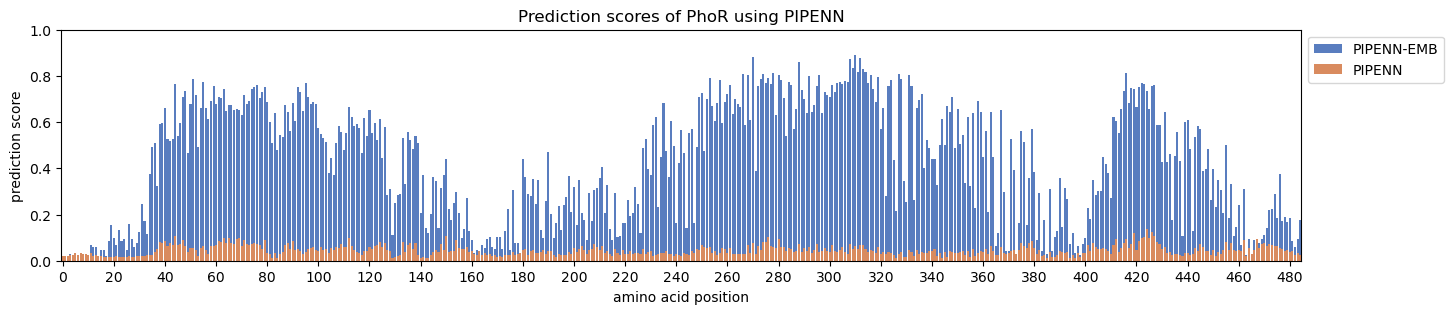

In [4]:
# PhoR plot with all only PIPENN1 and PIPENN2
fig, ax = plt.subplots(figsize=(16, 3))
 
sns.barplot(y = dfs['preds_pipenn2_phoR.csv']['y_preds'], x = dfs['preds_pipenn2_phoR.csv'].index, 
            ax = ax, label = 'PIPENN-EMB')
sns.barplot(y = dfs['preds_pipenn1_phoR.csv']['y_preds'], x = dfs['preds_pipenn1_phoR.csv'].index, 
            ax = ax, label = 'PIPENN')


ax.xaxis.set_major_locator(MultipleLocator(20))
ax.set_xlabel('amino acid position')
ax.set_ylabel('prediction score')
ax.set_title(f'Prediction scores of {'PhoR'} using {'PIPENN'}')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylim(0,1)

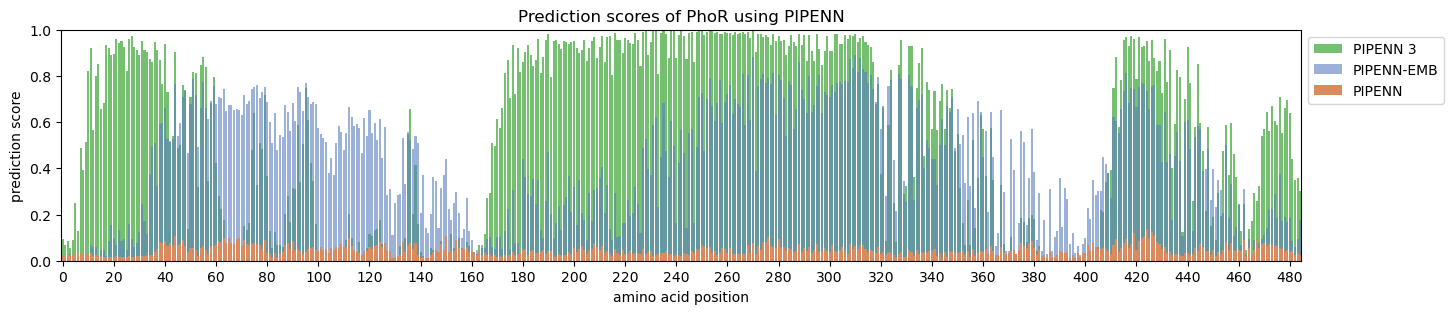

In [5]:
# PhoR plot with all 3 PIPENNs
fig, ax = plt.subplots(figsize=(16, 3))
 
sns.barplot(y = dfs['preds_pipenn3_phoR.csv']['y_preds'], x = dfs['preds_pipenn3_phoR.csv'].index, 
            ax = ax, label = 'PIPENN 3', alpha = 1, color = sns.color_palette('muted')[2])
sns.barplot(y = dfs['preds_pipenn2_phoR.csv']['y_preds'], x = dfs['preds_pipenn2_phoR.csv'].index, 
            ax = ax, label = 'PIPENN-EMB', alpha = .6, color = sns.color_palette('muted')[0])
sns.barplot(y = dfs['preds_pipenn1_phoR.csv']['y_preds'], x = dfs['preds_pipenn1_phoR.csv'].index, 
            ax = ax, label = 'PIPENN', alpha = 1, color = sns.color_palette('muted')[1])


ax.xaxis.set_major_locator(MultipleLocator(20))
ax.set_xlabel('amino acid position')
ax.set_ylabel('prediction score')
ax.set_title(f'Prediction scores of {'PhoR'} using {'PIPENN'}')
ax.set_ylim(0,1)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# PhoP PIPENN plots

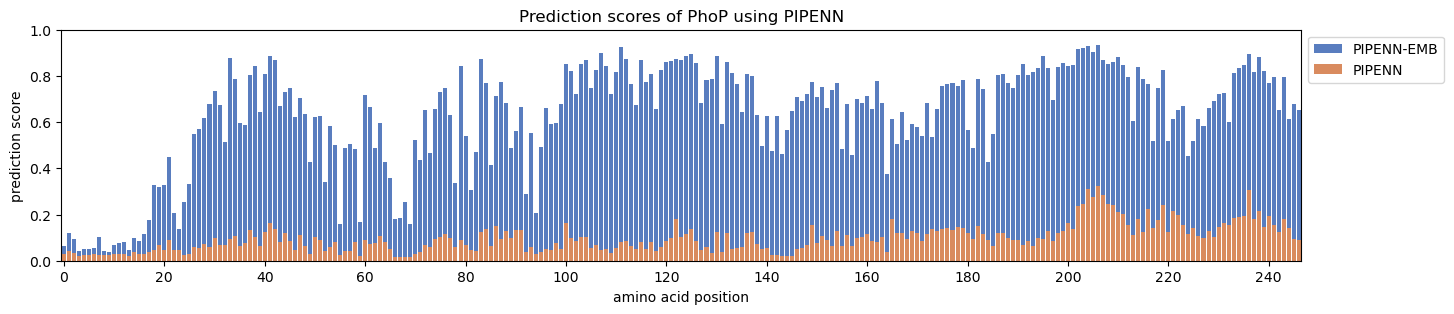

In [6]:
# PhoP plot with only PIPENN1 and PIPENN2
fig, ax = plt.subplots(figsize=(16, 3))
 
sns.barplot(y = dfs['preds_pipenn2_phoP.csv']['y_preds'], x = dfs['preds_pipenn2_phoP.csv'].index, 
            ax = ax, label = 'PIPENN-EMB', alpha = 1)
sns.barplot(y = dfs['preds_pipenn1_phoP.csv']['y_preds'], x = dfs['preds_pipenn1_phoP.csv'].index, 
            ax = ax, label = 'PIPENN', alpha = 1)


ax.xaxis.set_major_locator(MultipleLocator(20))
ax.set_xlabel('amino acid position')
ax.set_ylabel('prediction score')
ax.set_title(f'Prediction scores of {'PhoP'} using {'PIPENN'}')
ax.set_ylim(0,1)
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

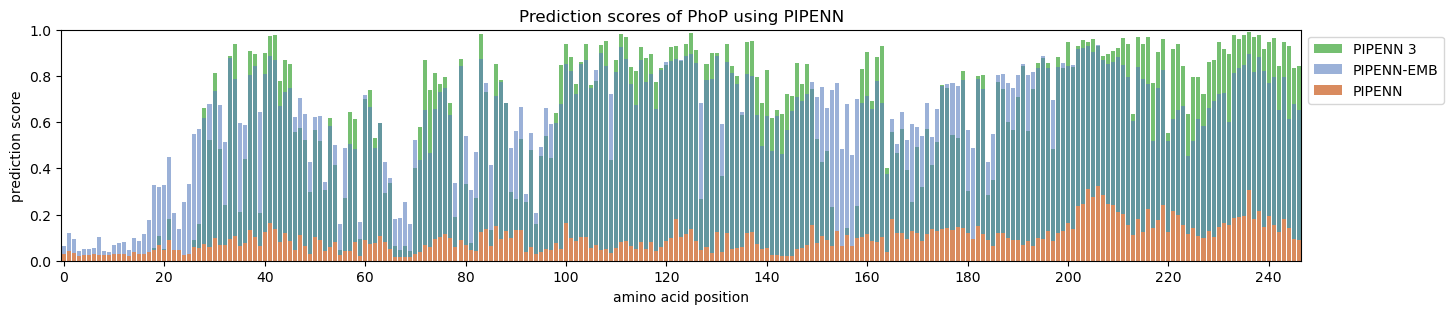

In [7]:
# PhoP plot with all 3 PIPENNs
fig, ax = plt.subplots(figsize=(16, 3))
 

sns.barplot(y = dfs['preds_pipenn3_phoP.csv']['y_preds'], x = dfs['preds_pipenn3_phoP.csv'].index, 
            ax = ax, label = 'PIPENN 3', alpha = 1, color = sns.color_palette('muted')[2])
sns.barplot(y = dfs['preds_pipenn2_phoP.csv']['y_preds'], x = dfs['preds_pipenn2_phoP.csv'].index, 
            ax = ax, label = 'PIPENN-EMB', alpha = .6, color = sns.color_palette('muted')[0])
sns.barplot(y = dfs['preds_pipenn1_phoP.csv']['y_preds'], x = dfs['preds_pipenn1_phoP.csv'].index, 
            ax = ax, label = 'PIPENN', alpha = 1, color = sns.color_palette('muted')[1])


ax.xaxis.set_major_locator(MultipleLocator(20))
ax.set_xlabel('amino acid position')
ax.set_ylabel('prediction score')
ax.set_title(f'Prediction scores of {'PhoP'} using {'PIPENN'}')
ax.set_ylim(0,1)
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [8]:
# saving transformed dfs to use in msa_analysis file
dfs['preds_pipenn2_phoP.csv'].to_csv('./pipenn2_phoP_df')
dfs['preds_pipenn2_phoR.csv'].to_csv('./pipenn2_phoR_df')

# Delete below

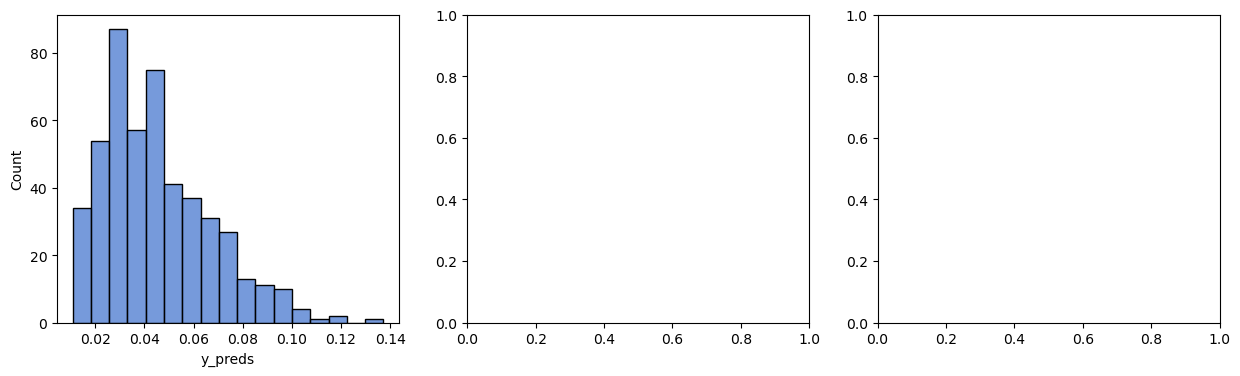

In [9]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize = (15, 4))
sns.histplot(dfs['preds_pipenn1_phoR.csv']['y_preds'], ax = ax1)
plt.show()
sns.histplot(dfs['preds_pipenn2_phoR.csv']['y_preds'], ax = ax2)
plt.show()
sns.histplot(dfs['preds_pipenn3_phoR.csv']['y_preds'], ax = ax3)
plt.show()

In [10]:
pipenn_plot(dfs, 'phoP', 10)

pipenn_plot(dfs, 'phoR', 20)

NameError: name 'pipenn_plot' is not defined

In [ ]:
phor_df = pd.concat([dfs['preds_pipenn1_phoR.csv'], dfs['preds_pipenn2_phoR.csv']], axis = 1).drop(columns = 'prot_seq')
phor_df.columns = ['PIPENN', 'PIPENN-EMB']
phor_df.describe()

In [ ]:
phop_df = pd.concat([dfs['preds_pipenn1_phoP.csv'], dfs['preds_pipenn2_phoP.csv']], axis = 1).drop(columns = 'prot_seq')
phop_df.columns = ['PIPENN', 'PIPENN-EMB']
phop_df.describe()

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize = (7, 5))

sns.violinplot(phop_df, ax = axes[0])
axes[0].set_title('PhoP')
axes[0].set_ylabel('prediction score')

sns.violinplot(phor_df, ax = axes[1])
axes[1].set_title('PhoR')
axes[1].set_ylabel('prediction score')

In [ ]:
# function that plots PIPENN scores with correct labels depending on which PIPENN model
# was used and which protein is plotted
def pipenn_plot(df_dict, protein, major_locator_num):
    fig, axes = plt.subplots(figsize=(16, 11), nrows = 2, ncols = 1)
    row = 0
    for key in df_dict.keys():
        _, program, prot = key.split('.')[0].split('_')
        if program == 'pipenn1':
            program = 'PIPENN'
        elif program == 'pipenn2':
            program = 'PIPENN-EMB'
        if protein == prot:
            df = dfs[key]
            sns.barplot(y = df['y_preds'], x = df.index, ax = axes[row])

            axes[row].xaxis.set_major_locator(MultipleLocator(major_locator_num))
            axes[row].set_xlabel('amino acid position')
            axes[row].set_ylabel('prediction score')
            axes[row].set_title(f'Prediction scores of {protein} using {program}')
            axes[row].set_ylim(0,1)
            row += 1